# Comparying CSHT between resolutions

How does progressively solving the eddy dynamics on Antarctic Margins can alter the total poleward heat transport towards the Antarctic Shelf, as well as its seasonality,and variability across different timescales? We can compare the 3 resolutions of panan to understand that a little better

**Currently we only have panan01 and panan005 ready, so we will have to stick to those :/**

In [1]:
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import cmocean as cm
import numpy as np
from dask.distributed import Client
from scipy.interpolate import interp1d

import xarray as xr
import cf_xarray as cfxr

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 28,Total memory: 251.20 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:43119,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 28
Started: Just now,Total memory: 251.20 GiB
Comm: tcp://127.0.0.1:36285,Total threads: 4
Dashboard: /proxy/46207/status,Memory: 35.89 GiB
Nanny: tcp://127.0.0.1:46191,


In [3]:
#panan01 daily as f(z,time)
src_p01 = '/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan01/CSHT_daily_z/*'
#panan005 daily as f(z,time)
src_p005 = '/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/Processed_data/panan005/CSHT_daily_z/*'

lat_slice  = slice(-83,-59)

figdir='/home/156/wf4500/v45_wf4500/Project_panan/GH/Panan_HT_ASC/figs/'

In [4]:
#importing panan01
import glob
gl =glob.glob(src_p01)
gl=sorted(gl)
print("%i netcdf data files"%len(gl))
p01_HT=xr.open_mfdataset(gl, concat_dim='time', combine='nested').rename({'zl':'z_l'})

12 netcdf data files


In [5]:
#importing panan005
import glob
gl =glob.glob(src_p005)
gl=sorted(gl)
print("%i netcdf data files"%len(gl))
p005_HT=xr.open_mfdataset(gl, concat_dim='time', combine='nested').rename({'zl':'z_l'})

12 netcdf data files


### Vertically integrating panan

In [6]:
P01_unbinned_HT=p01_HT.unbinned_heat_transp_across_contour.sum('z_l')
P01_binned_CSHT=p01_HT.binned_cross_slope_heat_trans.sum('z_l')
P01_binned_ZC=p01_HT.zonal_convergence.sum('z_l')

In [7]:
P005_unbinned_HT=p005_HT.unbinned_heat_transp_across_contour.sum('z_l')
P005_binned_CSHT=p005_HT.binned_cross_slope_heat_trans.sum('z_l')
P005_binned_ZC=p005_HT.zonal_convergence.sum('z_l')

In [8]:
#long and lat coordinates panan-01
P01_unbinned_lon=p01_HT.isel(time=0).lon_along_contour
P01_binned_lon=p01_HT.isel(time=0).lon_bin_midpoints
P01_unbinned_lat=p01_HT.isel(time=0).lat_along_contour
P01_binned_lat=p01_HT.isel(time=0).lat_bin_midpoints
#long and lat coordinates panan-005
P005_unbinned_lon=p005_HT.isel(time=0).lon_along_contour
P005_binned_lon=p005_HT.isel(time=0).lon_bin_midpoints
P005_unbinned_lat=p005_HT.isel(time=0).lat_along_contour
P005_binned_lat=p005_HT.isel(time=0).lat_bin_midpoints


In [9]:
#temporal means for panan01
P01_unbinned_HT_mean=P01_unbinned_HT.groupby('time.month').mean('time').mean('month').load()
P01_binned_CSHT_mean=P01_binned_CSHT.groupby('time.month').mean('time').mean('month').load()
P01_binned_ZC_mean=P01_binned_ZC.groupby('time.month').mean('time').mean('month').load()

In [10]:
#temporal means for panan005
P005_unbinned_HT_mean=P005_unbinned_HT.groupby('time.month').mean('time').mean('month').load()
P005_binned_CSHT_mean=P005_binned_CSHT.groupby('time.month').mean('time').mean('month').load()
P005_binned_ZC_mean=P005_binned_ZC.groupby('time.month').mean('time').mean('month').load()

In [11]:
#factors
p01_factor=P01_unbinned_HT_mean.sum()/(P01_binned_CSHT_mean+P01_binned_ZC_mean).sum()
p005_factor=P005_unbinned_HT_mean.sum()/(P005_binned_CSHT_mean+P005_binned_ZC_mean).sum()

### Mean total (circumpolar) cross-slope-heat-transport

Plot for the mean cumsum of CSHT, unbinned

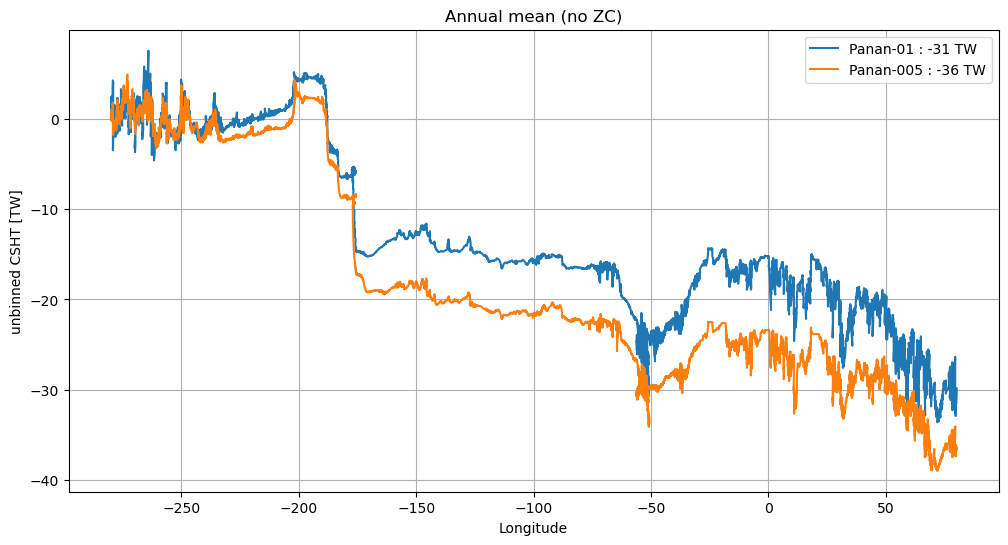

In [12]:
p01_total= int(P01_unbinned_HT_mean.sum().values/1e12)
p005_total= int(P005_unbinned_HT_mean.sum().values/1e12)
fig = plt.figure(figsize=(12,6))

plt.plot(P01_unbinned_lon,P01_unbinned_HT_mean.cumsum()/1e12,label="Panan-01 : " + str(p01_total) + " TW")
plt.plot(P005_unbinned_lon,P005_unbinned_HT_mean.cumsum()/1e12,color="tab:orange",label="Panan-005 : " + str(p005_total) + " TW")
plt.xlabel('Longitude'); plt.ylabel('unbinned CSHT [TW]'); plt.title('Annual mean (no ZC)')
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_unbinned_HT_cumsum_Annual_mean.png',dpi=300)

Interestingly, the total CSHT increases with resolution on panan. we have a 5 TW increase for a increase in resolution of 4 times. 

Also, looking at the unbinned curves, it seems like a lot of the difference comes from the inner Ross sea [-200 -150] longs. The high noise in the plot, and not accounting for the Zonal COnvergence might be misleading tho

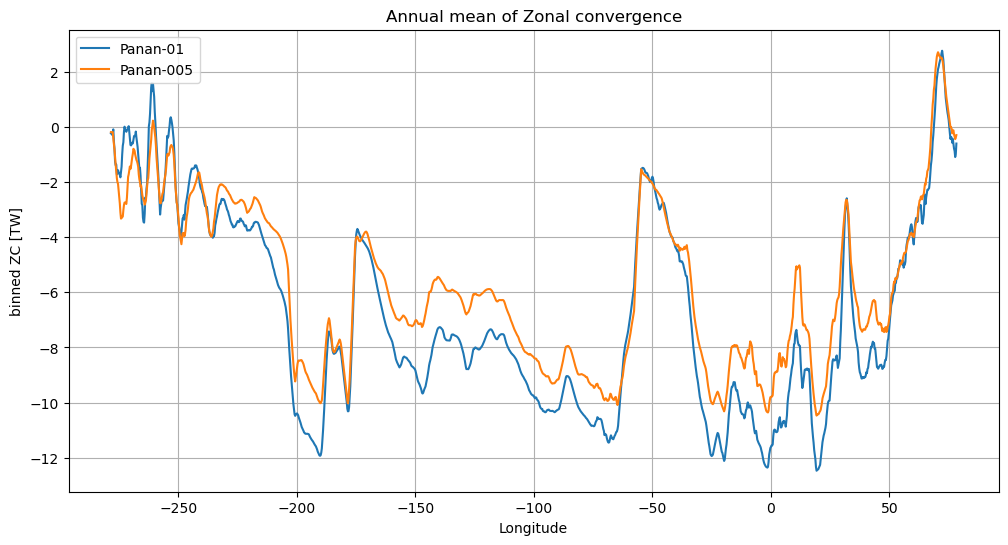

In [13]:
fig = plt.figure(figsize=(12,6))

plt.plot(P01_binned_lon,P01_binned_ZC_mean.cumsum()*p01_factor/1e12,label="Panan-01")
plt.plot(P005_binned_lon,P005_binned_ZC_mean.cumsum()*p005_factor/1e12,color="tab:orange",label="Panan-005")
plt.xlabel('Longitude'); plt.ylabel('binned ZC [TW]'); plt.title('Annual mean of Zonal convergence')
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_binned_ZC_cumsum_Annual_mean.png',dpi=300)

Zonal convergence between plots is quite similar, but panan-005is closer to 0 at some points. Highly speculative idea here, but maybe a higher resolution better represents ASC and diminishes the effect of the ASC crossing the 1km isobath back and forth on the comupted cross-slope-heat transport?

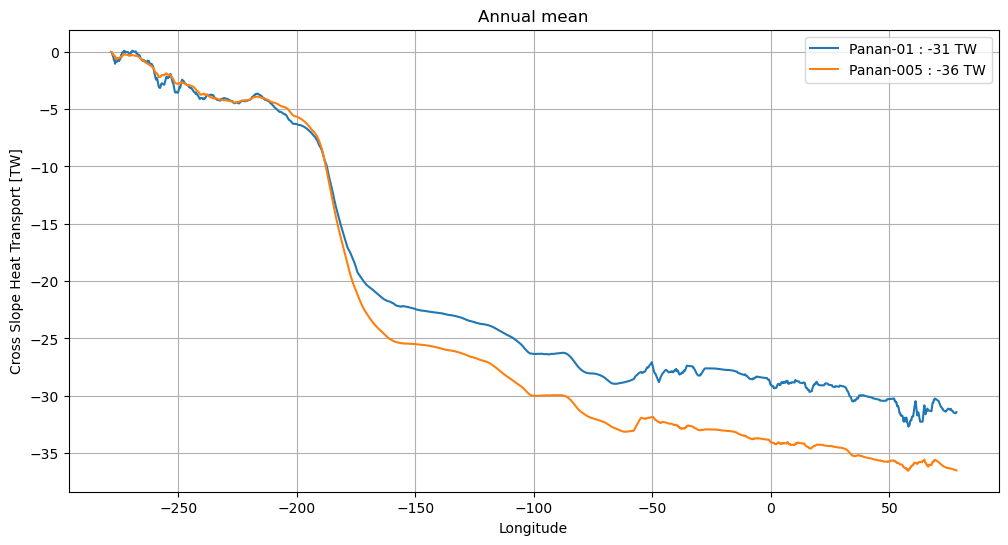

In [14]:
fig = plt.figure(figsize=(12,6))

plt.plot(P01_binned_lon,(P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor/1e12,label="Panan-01 : " + str(p01_total) + " TW")
plt.plot(P005_binned_lon,(P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor/1e12,color="tab:orange",label="Panan-005 : " + str(p005_total) + " TW")
plt.xlabel('Longitude'); plt.ylabel('Cross Slope Heat Transport [TW]'); plt.title('Annual mean')
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_binned_HTplusZC_cumsum_Annual_mean.png',dpi=300)

In [15]:
#how much the CSHT differs at the edge of the inner Ross sea (-150)?
Ross_cumsum_diff= (((P005_binned_CSHT_mean+P005_binned_ZC_mean).cumsum()*p005_factor/1e12).sel(lon_bin_midpoints=-150, method='nearest')) - (((P01_binned_CSHT_mean+P01_binned_ZC_mean).cumsum()*p01_factor/1e12).sel(lon_bin_midpoints=-150, method='nearest') ) 
print( "CSHT differs by " + str(int(Ross_cumsum_diff)) + " TW, when summing only until the edge of the Ross Sea at 150 West")


CSHT differs by -3 TW, when summing only until the edge of the Ross Sea at 150 West


Even accounting for the binned CSHT and the Zonal Convergence, it seems like a good part of the difference in CSHT between the resolutions come from  increased poleward heat transport in the Ross Sea. For example the longitude of 150W, the difference in CSHT between simulations is 3 TW, compare to the total circumpolar difference of 5 TW.

It doesnt seem much at first, but notice that by 200W, the CSHT is the same in both simulations. **60% of the increase in CSHT with resolution happens in a narrow band between  200W and 150W.**

### Seasonal Cycle changes

Is the difference in CSHT between simulations spread uniformly accross seasons? Or is it summer based ?(related to surface ekman transport)

In [16]:
#temporal means for panan01
P01_unbinned_HT_season=P01_unbinned_HT.groupby('time.month').mean('time').sum('contour_index').load()
P01_binned_CSHT_season=P01_binned_CSHT.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()
P01_binned_ZC_season=P01_binned_ZC.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()

#temporal means for panan005
P005_unbinned_HT_season=P005_unbinned_HT.groupby('time.month').mean('time').sum('contour_index').load()
P005_binned_CSHT_season=P005_binned_CSHT.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()
P005_binned_ZC_season=P005_binned_ZC.groupby('time.month').mean('time').sum('lon_bin_midpoints').load()

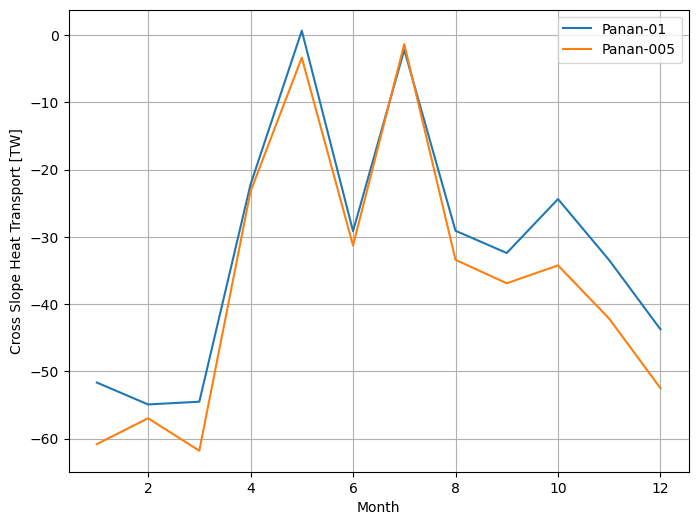

In [17]:
fig = plt.figure(figsize=(8,6))

#plt.subplot(1,2,1)
(P01_unbinned_HT_season/1e12).plot(label='Panan-01')
(P005_unbinned_HT_season/1e12).plot(label='Panan-005')
#((P005_unbinned_HT_season-P01_unbinned_HT_season)/1e12).plot(label=r'0.05  - 0.1')
plt.xlabel('Month'); plt.ylabel('Cross Slope Heat Transport [TW]')
plt.grid()
plt.legend()

plt.savefig(figdir+'RESCOMP_seasonalCSHT.png',dpi=300)

Most of the difference in CSHT here happens between September and March, so definetly in the summer and spring. So maybe the Surface Ekman transport is stronger on panan-005. This is a recurrent issue when calcualting the CSHT ( how much of the computed CSHT we see is due to Surface Ekman transport, that does not reach ice shelves). To solve this problem we will have to separate the CSHT ina few ocean stratus (Surface, and Deep). Lets do that next;

### Cross-slope-heat-transport in different depth layers

One important decision we need to make here is where we gonna set the cutout depth for the surface fluxes. Maybe analysing density surfaces can help us. The series of steps you will use for it will be...

[a] In a annual mean map of surface potrho0, check which contour gets close to the ANtarctic Margin in a more consistent way across all longitudes (if there is)

In [18]:
session = cc.database.create_session()

In [19]:
lat_range = slice(-90,-59)
start_time='2000-01'
end_time='2000-12'
time_slice=slice(start_time,end_time)

In [20]:
exp01 = 'panant-01-zstar-ACCESSyr2'
exp005 = 'panant-005-zstar-ACCESSyr2'

MLD_01 = cc.querying.getvar(exp01,'mlotst',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')
MLD_005 = cc.querying.getvar(exp005,'mlotst',session,frequency='1 monthly',start_time=start_time,end_time=end_time).sel(time=time_slice).sel(yh=lat_range).mean('time')


/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:270: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:270: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3.10/site-packages/xarray/core/dataset.py:270: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.07/lib/python3

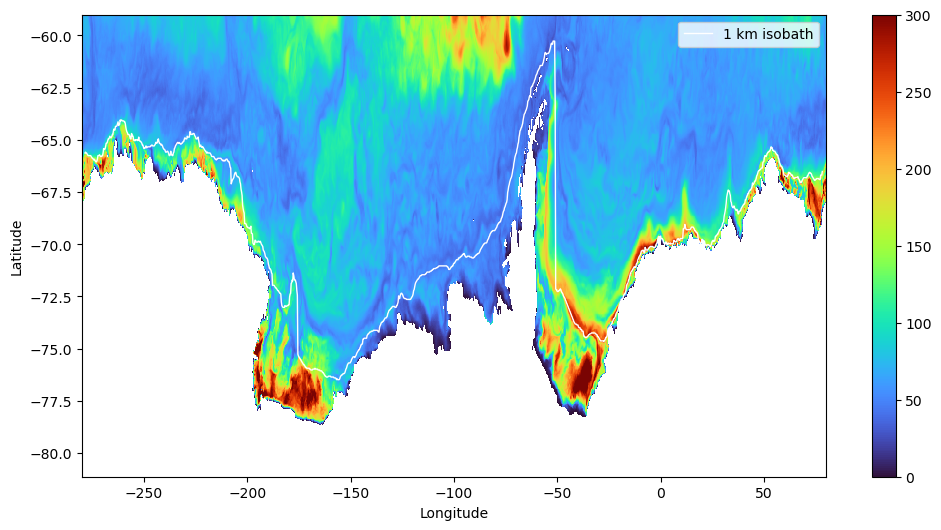

In [21]:
fig = plt.figure(figsize=(12,6))
plt.pcolormesh(MLD_01.xh,MLD_01.yh,MLD_01,vmin=0,vmax=300,cmap='turbo')
plt.colorbar()

plt.plot(P01_binned_lon,P01_binned_lat,color='white',linewidth=1,label='1 km isobath')
plt.xlabel('Longitude'); plt.ylabel('Latitude'); 
plt.legend()

it seems that the isopycnal of **1036.0 kg/m3** gets to the surface roughly close to the Antarctic Margin. SO I will use this density level to set up the cutout depth

In [22]:
#Extracting densities along the contour
MLD_01_1km= MLD_01.sel(xh=P01_binned_lon,yh=P01_binned_lat,method='nearest')
MLD_005_1km= MLD_005.sel(xh=P005_binned_lon,yh=P005_binned_lat,method='nearest')



In [23]:
#temporal means for panan01
P01_binned_CSHT_z=p01_HT.binned_cross_slope_heat_trans.groupby('time.month').mean('time').mean('month')
P01_binned_ZC_z=p01_HT.zonal_convergence.groupby('time.month').mean('time').mean('month')
P01_binned_CSHT_ZC_z=(P01_binned_CSHT_z+P01_binned_ZC_z)*p01_factor


#temporal means for panan005
P005_binned_CSHT_z=p005_HT.binned_cross_slope_heat_trans.groupby('time.month').mean('time').mean('month')
P005_binned_ZC_z=p005_HT.zonal_convergence.groupby('time.month').mean('time').mean('month')
P005_binned_CSHT_ZC_z=(P005_binned_CSHT_z+P005_binned_ZC_z)*p005_factor

In [24]:
MLD_01_1km.mean().values

array(115.093094, dtype=float32)

(1500.0, 0.0)

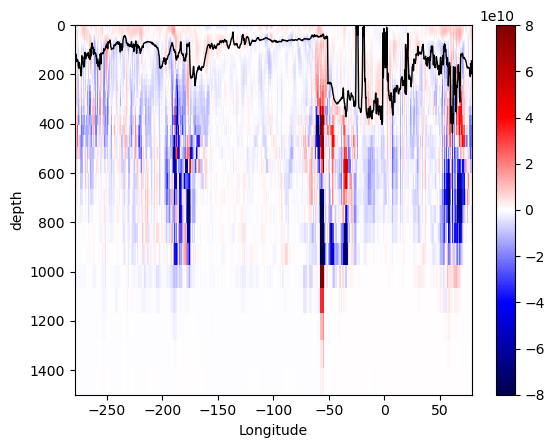

In [25]:
#P01_binned_CSHT_ZC_z.plot()
plt.pcolormesh(P01_binned_CSHT_ZC_z.lon_bin_midpoints,P01_binned_CSHT_ZC_z.z_l,
               P01_binned_CSHT_ZC_z,vmin=-0.8e11,vmax=0.8e11,cmap='seismic')

plt.ylabel('depth'); plt.xlabel('Longitude')
plt.colorbar()

plt.plot(MLD_01_1km.lon_bin_midpoints,MLD_01_1km*1.2,color='black',linewidth=1)
plt.ylim(1500,0)

Maybe I can use a 1.2 times the mixed layer depth in each grid point? Or is mixed layer depth not an accurate depth to separate the Surface ekman transport? Discuss that with Adele.

Suggestions on the previous ASC_collab-meeting was to cut it off at three marks, 200m, 300m, and 500m.

In [26]:
cutout_depth=MLD_01_1km*1.2

In [36]:
#unbinned MLD
MLD_unbinned01_1km= MLD_01.sel(xh=P01_unbinned_lon,yh=P01_unbinned_lat,method='nearest')
MLD_unbinned005_1km= MLD_005.sel(xh=P005_unbinned_lon,yh=P005_unbinned_lat,method='nearest')
#cutour depth in unbinned data
cutout_depth_unbinned01=MLD_unbinned01_1km*1.2
cutout_depth_unbinned005=MLD_unbinned005_1km*1.2

In [46]:
#temporal means for panan01, unbinned
P01_unbinned_HT_z=p01_HT.unbinned_heat_transp_across_contour.groupby('time.month').mean('time').mean('month')

(1500.0, 0.0)

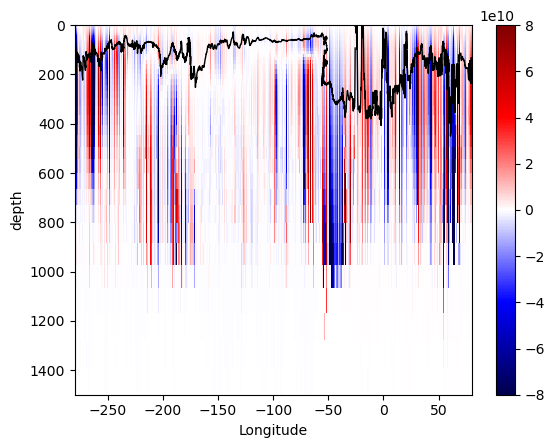

In [47]:
#P01_binned_CSHT_ZC_z.plot()
plt.pcolormesh(P01_unbinned_lon,P01_unbinned_HT_z.z_l,
               P01_unbinned_HT_z,vmin=-0.8e11,vmax=0.8e11,cmap='seismic')

plt.ylabel('depth'); plt.xlabel('Longitude')
plt.colorbar()

plt.plot(P01_unbinned_lon,MLD_unbinned01_1km*1.2,color='black',linewidth=1)
plt.ylim(1500,0)

Unbinned and binned MLD seem similar

In [38]:
#cutting out MLD*1.2 on unbinned HT
p01_unbinnedHT_zl=p01_HT.z_l +  p01_HT.unbinned_heat_transp_across_contour*0
p01_unbinnedHT_cut=p01_HT.unbinned_heat_transp_across_contour.where(p01_unbinnedHT_zl>cutout_depth_unbinned01)



In [48]:
#cutting out MLD*1.2 on CSHT in panan01
p01_HT_zl=p01_HT.z_l +  p01_HT.binned_cross_slope_heat_trans*0
p01_HT_cut=p01_HT.binned_cross_slope_heat_trans.where(p01_HT_zl>cutout_depth)
p01_ZC_cut=p01_HT.zonal_convergence.where(p01_HT_zl>cutout_depth)
p01_CSHT_cut=(p01_HT_cut+p01_ZC_cut)*p01_factor

#cutting out MLD*1.2 on CSHT in panan005
p005_HT_zl=p005_HT.z_l +  p005_HT.binned_cross_slope_heat_trans*0
p005_HT_cut=p005_HT.binned_cross_slope_heat_trans.where(p01_HT_zl>cutout_depth)
p005_ZC_cut=p005_HT.zonal_convergence.where(p01_HT_zl>cutout_depth)
p005_CSHT_cut=(p005_HT_cut+p005_ZC_cut)*p005_factor

In [49]:
# Interesting that the transport is actually bigger if we separate the surface! Not what I would have expected
totalbin_CSHT_below_MLD_01 = p01_CSHT_cut.sum('z_l').sum('lon_bin_midpoints').groupby('time.month').mean('time').mean('month').values/1e12

# Interesting that the transport is actually bigger if we separate the surface! Not what I would have expected
totalbin_CSHT_below_MLD_005 = p005_CSHT_cut.sum('z_l').sum('lon_bin_midpoints').groupby('time.month').mean('time').mean('month').values/1e12

totalunbinned_CSHT_below_MLD_01 = p01_unbinnedHT_cut.sum('z_l').sum('contour_index').groupby('time.month').mean('time').mean('month').values/1e12
#maybe try o Heat transport_across contour, since it doesnt need scaling, and you are summing everything anyways
#MLD also changes from summer to winter,so I might need to have different cutours for each month

Even tho the MLD is fairly similar between the unbinned and binned contours, still the total CSHT below the MLD differs substantially between these (12 TW). Why, and which one would be correct?

Some options are:

**[R1] :Zonal Convergence** : This is computed since the heat coming lateraly into a bin would not (necessarily) be the same laterally exiting that bin. However, when we do the ZC as a function of depth, we assume that ASC would be outgoing in the same depth as it is incoming (Which is likely not true). By that thought, for circumpolar analysis the unbinned transports would likely be more accurate. 

**[R2] :Factor correction** : We use a factor (0.08) to scale back the binned CSHT towards the unbinned total one. That factor is calculated based on the ratio between the total unbinned transport over the sum of the binned variables (ZC + binned CSHT). The number likely reflect how much bin overestimation happens in the overlapping regions of the bins ( bin width 3deg is larger than bin spacing 0.25deg), and takes into account the total ZC in all depths. However, the MLD is cut different along the contour, so it is likely that this factor would vary along the contour in this configuration. SO the 0.08 factor wouldnt be appropriate here ( or a uniform factor per say). This rationale suggests any vertical separation has to use the same depth through the contour, so lets try that.

### Timeseries of cross-slope-heat-transport

In [61]:
P01_total_daily = P01_unbinned_HT.sum('contour_index')
P005_total_daily = P005_unbinned_HT.sum('contour_index')

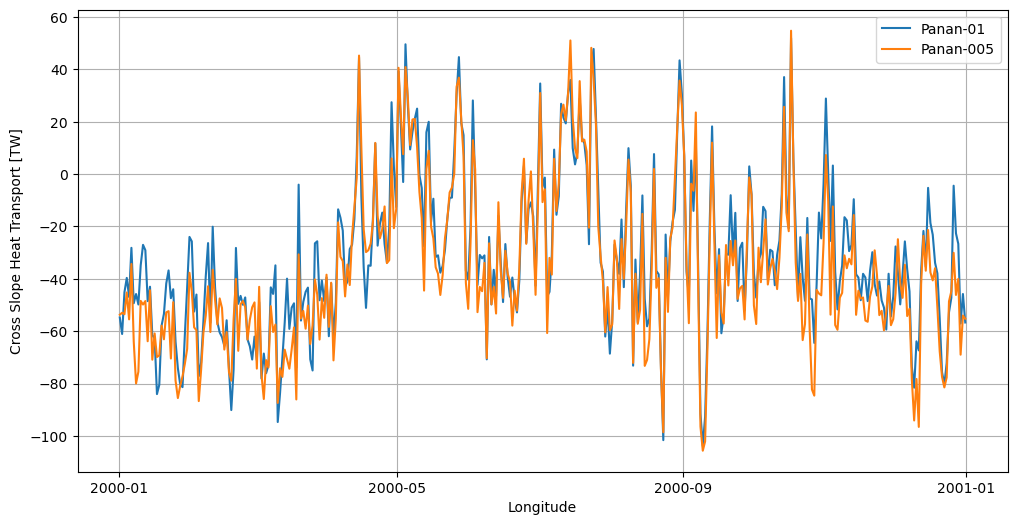

In [69]:
fig = plt.figure(figsize=(12,6))

(P01_total_daily/1e12).plot(label='Panan-01')
(P005_total_daily/1e12).plot(label='Panan-005')
plt.xlabel('Longitude'); plt.ylabel('Cross Slope Heat Transport [TW]'); 
plt.grid()
plt.legend()
plt.savefig(figdir+'RESCOMP_dailyCSHT.png',dpi=300)